# Applied Data Science Capstone Week 2


## BUSINESS PROBLEM
The problem is a lot of accidents occur on the road at Seattle due to a several factors. Such accidents cause traffic jams and distractions on the road which make it difficult for people to get to their destination quickly. People can be late to work, school, meetings and other important functions which can make or break their careers. Regarding this problem, it would be beneficial to have something to alert people of an accident and how severe it is. The severity of the accident could indicate how long it would take to clear the road. Being able to detect an accident and its severity could go a long way to solving the traffic jam on the road and enable people get to their destinations quickly. The people of Seattle would appreciate this new found information and be more confident of safety.

## DATA
The data used was acquired from the IBM data science specialization on coursera. It was provided to be used for this problem. The data is in a csv format. The data has a target column which is the value to be predicted. The target for this data is severity, which indicates how severe the accident is. It has two levels of 1 and 2, 1 indicates increased severity and 2 indicates reduced severity. It is an unbalanced dataset. There are 37 other columns which would be used to predict the severity. For example, the fatalities column indicates the number of fatalities in the collision, this feature would be very important to determine the severity of the collision. Another important feature would be whether or not a driver involved was under the influence of drugs or alcohol, whether was collision was due to inattention, the weather conditions at the time of collision etc. Several of the features would be important to predict this severity and some would not be so such features would need to be removed.
SEVERITYCODE is the target feature
A number of features need to be dropped since it would not help in determining the severity of the, OBJECTID, INCKEY, COLDETKEY, INTKEY, EXCEPTRSNCODE, EXCEPTRSNDESC,, ST_COLCODE, SEGLANEKEY, CROSSWALKKEY, SHAPE, SDOT_COLDESC, SDOTCOLNUM, ST_COLDESC, SDOT_COLCODE, INCKEY,REPORTNO,LOCATION
The rest of the features would therefore be used for the prediction.



In [437]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [438]:
data=pd.read_csv(r'C:\Users\ampad\Downloads\Data-Collisions.csv')
print(data.shape)
data.head()

(194673, 38)


C:\Users\ampad\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [439]:
data.drop(columns=['OBJECTID','INCKEY','COLDETKEY','INTKEY','EXCEPTRSNCODE','EXCEPTRSNDESC','ST_COLCODE','SEGLANEKEY','CROSSWALKKEY','SDOT_COLDESC','SDOTCOLNUM','ST_COLDESC','SDOT_COLCODE','INCKEY','REPORTNO','LOCATION','SEVERITYCODE.1','X','Y','INCDATE','INATTENTIONIND','PEDROWNOTGRNT','SPEEDING','STATUS','INCDTTM','SEVERITYDESC'], inplace=True)

In [440]:
print(data.shape)
data.head()

(194673, 13)


,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR
0,2,Intersection,Angles,2,0,0,2,At Intersection (intersection related),N,Overcast,Wet,Daylight,N
1,1,Block,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,N
2,1,Block,Parked Car,4,0,0,3,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight,N
3,1,Block,Other,3,0,0,3,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,N
4,2,Intersection,Angles,2,0,0,2,At Intersection (intersection related),0,Raining,Wet,Daylight,N


In [441]:
data['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [442]:
data.isnull().sum()

SEVERITYCODE        0
ADDRTYPE         1926
COLLISIONTYPE    4904
PERSONCOUNT         0
PEDCOUNT            0
PEDCYLCOUNT         0
VEHCOUNT            0
JUNCTIONTYPE     6329
UNDERINFL        4884
WEATHER          5081
ROADCOND         5012
LIGHTCOND        5170
HITPARKEDCAR        0
dtype: int64

In [443]:
data.shape

(194673, 13)

In [444]:
data.dropna(inplace=True)

In [445]:
data.isnull().sum()

SEVERITYCODE     0
ADDRTYPE         0
COLLISIONTYPE    0
PERSONCOUNT      0
PEDCOUNT         0
PEDCYLCOUNT      0
VEHCOUNT         0
JUNCTIONTYPE     0
UNDERINFL        0
WEATHER          0
ROADCOND         0
LIGHTCOND        0
HITPARKEDCAR     0
dtype: int64

In [446]:
data.shape

(182895, 13)

In [447]:
data.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR
0,2,Intersection,Angles,2,0,0,2,At Intersection (intersection related),N,Overcast,Wet,Daylight,N
1,1,Block,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,N
2,1,Block,Parked Car,4,0,0,3,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight,N
3,1,Block,Other,3,0,0,3,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,N
4,2,Intersection,Angles,2,0,0,2,At Intersection (intersection related),0,Raining,Wet,Daylight,N


In [448]:
data.dtypes

SEVERITYCODE      int64
ADDRTYPE         object
COLLISIONTYPE    object
PERSONCOUNT       int64
PEDCOUNT          int64
PEDCYLCOUNT       int64
VEHCOUNT          int64
JUNCTIONTYPE     object
UNDERINFL        object
WEATHER          object
ROADCOND         object
LIGHTCOND        object
HITPARKEDCAR     object
dtype: object

In [449]:
data['SEVERITYCODE']=data['SEVERITYCODE'].astype(object)


In [450]:
data.describe()

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT
count,182895.000000,182895.000000,182895.000000,182895.000000
mean,2.476268,0.038995,0.029831,1.971984
std,1.370912,0.202960,0.171435,0.563237
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,2.000000
50%,2.000000,0.000000,0.000000,2.000000
75%,3.000000,0.000000,0.000000,2.000000
max,81.000000,6.000000,2.000000,12.000000


In [451]:
data['ADDRTYPE'].value_counts()

Block           119362
Intersection     63298
Alley              235
Name: ADDRTYPE, dtype: int64

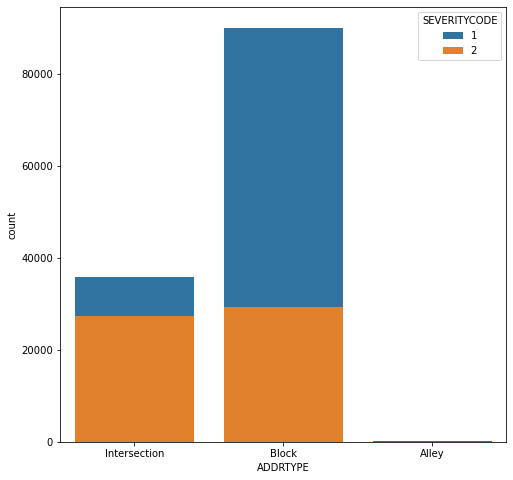

In [452]:
plt.figure(figsize=(8,8))
sns.countplot(x=data['ADDRTYPE'], hue=data['SEVERITYCODE'],dodge=False)

In [453]:
data['COLLISIONTYPE'].value_counts()

Parked Car    43119
Angles        34453
Rear Ended    33641
Other         22960
Sideswipe     18285
Left Turn     13637
Pedestrian     6513
Cycles         5362
Right Turn     2929
Head On        1996
Name: COLLISIONTYPE, dtype: int64

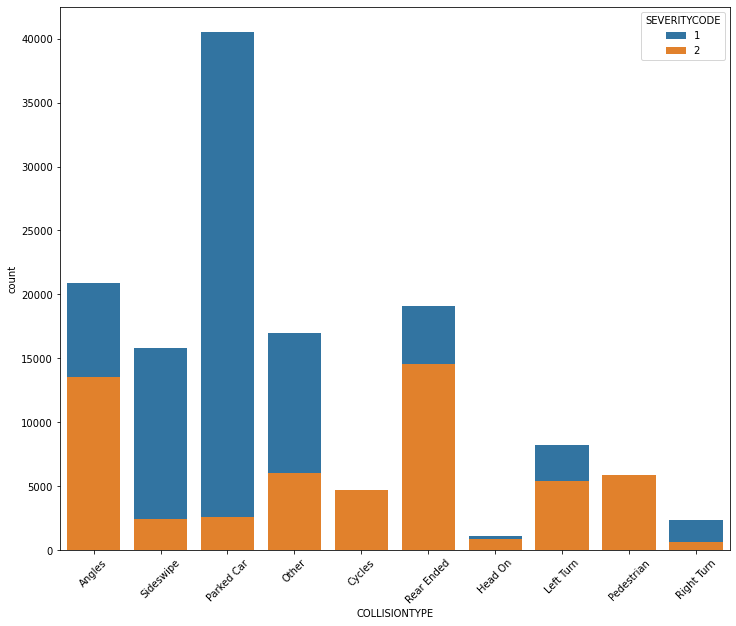

In [454]:
plt.figure(figsize=(12,10))
plt.xticks(rotation=45)
sns.countplot(x=data['COLLISIONTYPE'], hue=data['SEVERITYCODE'],dodge=False)

Mid-Block (not related to intersection)              86609
At Intersection (intersection related)               61206
Mid-Block (but intersection related)                 22341
Driveway Junction                                    10519
At Intersection (but not related to intersection)     2055
Ramp Junction                                          160
Unknown                                                  5
Name: JUNCTIONTYPE, dtype: int64


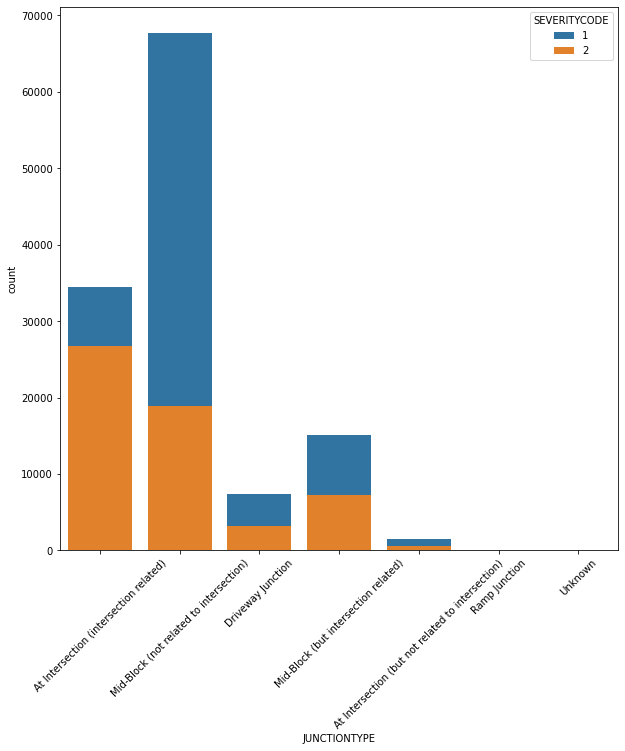

In [455]:
print(data['JUNCTIONTYPE'].value_counts())
plt.figure(figsize=(10,10))
plt.xticks(rotation=45)
sns.countplot(x=data['JUNCTIONTYPE'], hue=data['SEVERITYCODE'],dodge=False)

N    94956
0    78942
Y     5020
1     3977
Name: UNDERINFL, dtype: int64


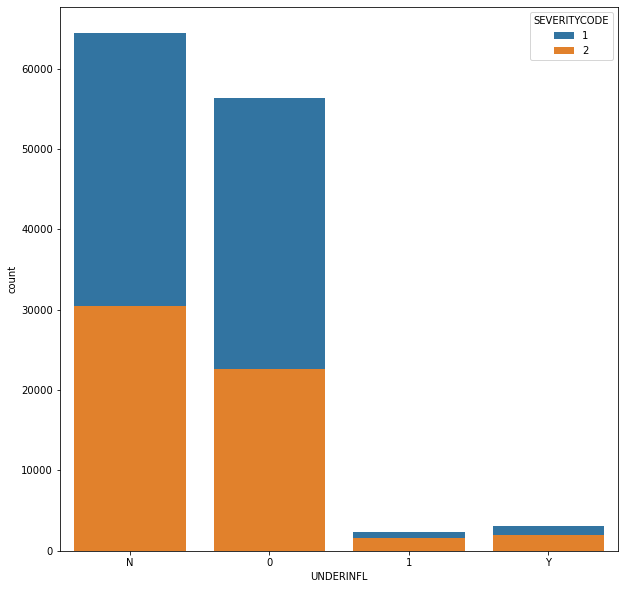

In [456]:
print(data['UNDERINFL'].value_counts())
plt.figure(figsize=(10,10))
sns.countplot(x=data['UNDERINFL'], hue=data['SEVERITYCODE'],dodge=False)

Clear                       109059
Raining                      32642
Overcast                     27183
Unknown                      11637
Snowing                        881
Other                          746
Fog/Smog/Smoke                 556
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               49
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64


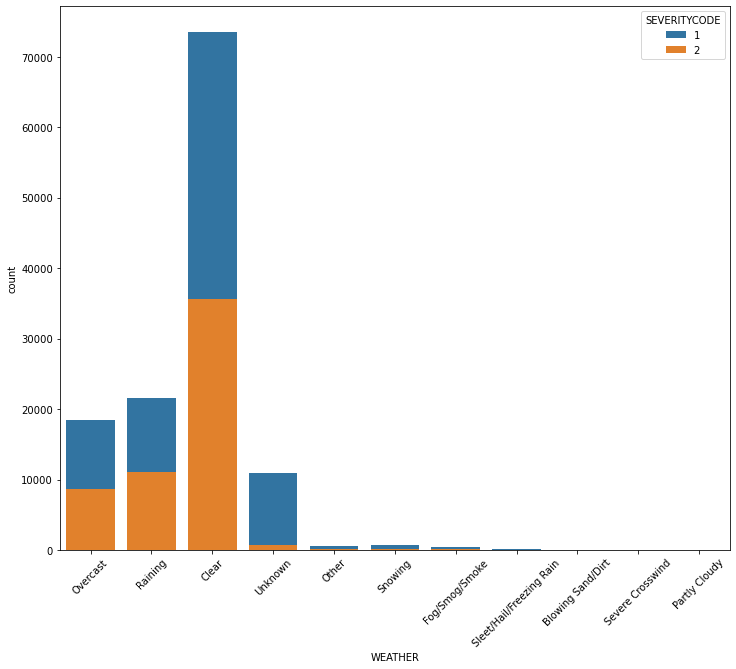

In [457]:
print(data['WEATHER'].value_counts())
plt.figure(figsize=(12,10))
plt.xticks(rotation=45)
sns.countplot(x=data['WEATHER'], hue=data['SEVERITYCODE'],dodge=False)

Dry               122153
Wet                46710
Unknown            11519
Ice                 1177
Snow/Slush           978
Other                123
Standing Water       108
Sand/Mud/Dirt         67
Oil                   60
Name: ROADCOND, dtype: int64


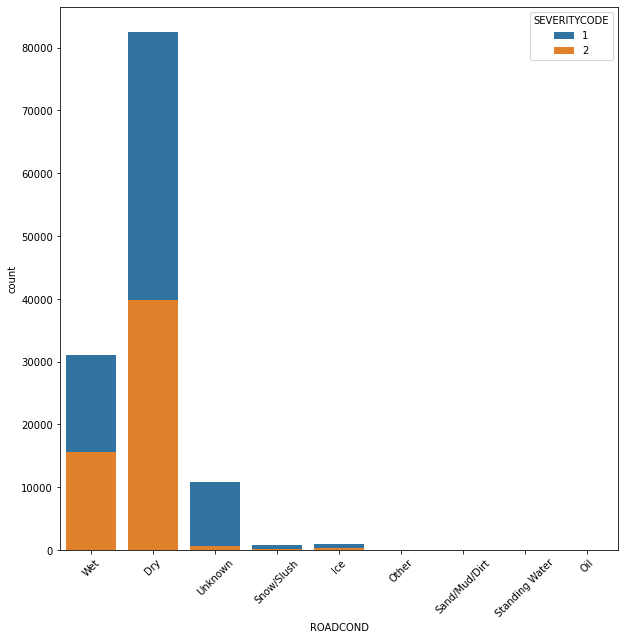

In [458]:
print(data['ROADCOND'].value_counts())
plt.figure(figsize=(10,10))
plt.xticks(rotation=45)
sns.countplot(x=data['ROADCOND'], hue=data['SEVERITYCODE'],dodge=False)

Daylight                    113837
Dark - Street Lights On      47547
Unknown                      10448
Dusk                          5771
Dawn                          2453
Dark - No Street Lights       1461
Dark - Street Lights Off      1157
Other                          210
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64


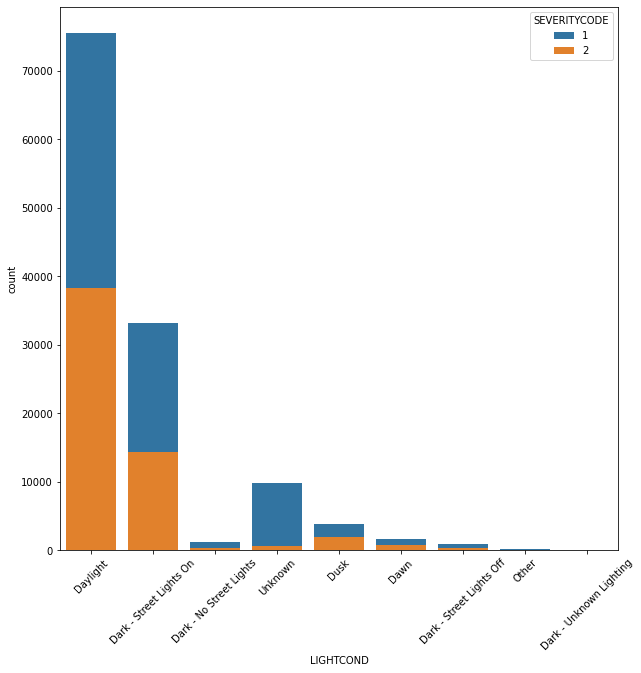

In [459]:
print(data['LIGHTCOND'].value_counts())
plt.figure(figsize=(10,10))
plt.xticks(rotation=45)
sns.countplot(x=data['LIGHTCOND'], hue=data['SEVERITYCODE'],dodge=False)

N    177205
Y      5690
Name: HITPARKEDCAR, dtype: int64


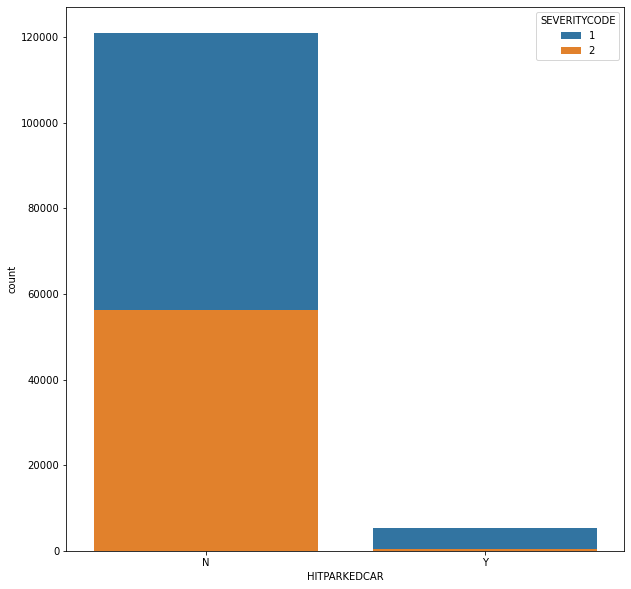

In [460]:
print(data['HITPARKEDCAR'].value_counts())
plt.figure(figsize=(10,10))
sns.countplot(x=data['HITPARKEDCAR'], hue=data['SEVERITYCODE'],dodge=False)

In [461]:
data['PERSONCOUNT']=data['PERSONCOUNT'].astype('object')
data['PEDCOUNT']=data['PEDCOUNT'].astype('object')
data['PEDCYLCOUNT']=data['PEDCYLCOUNT'].astype('object')
data['VEHCOUNT']=data['VEHCOUNT'].astype('object')

In [462]:
print(data['PERSONCOUNT'].value_counts())

2     105703
3      34812
4      14327
1      11232
5       6541
0       5365
6       2686
7       1121
8        531
9        213
10       127
11        56
12        33
13        21
14        19
15        11
17        11
16         8
44         6
18         6
20         6
25         6
19         5
26         4
22         4
27         3
28         3
29         3
47         3
32         3
34         3
37         3
23         2
21         2
24         2
30         2
36         2
57         1
31         1
35         1
39         1
41         1
43         1
48         1
53         1
54         1
81         1
Name: PERSONCOUNT, dtype: int64


In [464]:
bins=[0,1,2,3,81]
labels=['Very Few num','Few num','Medium num','High num']
data['PERSONCOUNT'] = pd.cut(data['PERSONCOUNT'], bins=bins, labels=labels, right=False)

In [465]:
data['PERSONCOUNT'].value_counts()

Medium num      105703
High num         60594
Few num          11232
Very Few num      5365
Name: PERSONCOUNT, dtype: int64

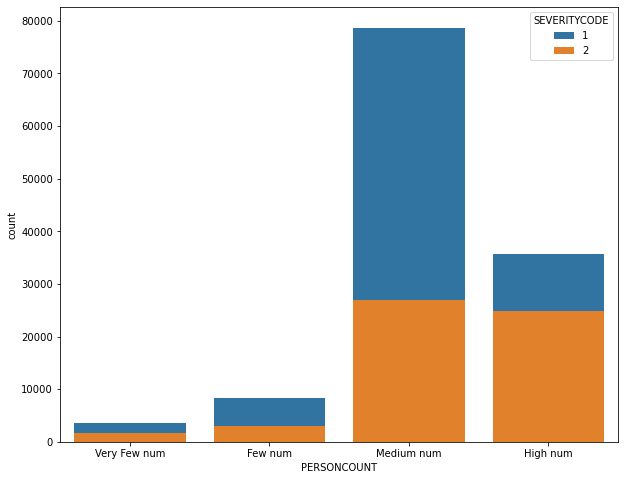

In [466]:
plt.figure(figsize=(10,8))
sns.countplot(data['PERSONCOUNT'], hue=data['SEVERITYCODE'],dodge=False)

In [467]:
data.describe()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR
count,182895,182895,182895,182894,182895,182895,182895,182895,182895,182895,182895,182895,182895
unique,2,3,10,4,7,3,13,7,4,11,9,9,2
top,1,Block,Parked Car,Medium num,0,0,2,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,N
freq,126270,119362,43119,105703,176053,177480,141647,86609,94956,109059,122153,113837,177205


In [468]:
data.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR
0,2,Intersection,Angles,Medium num,0,0,2,At Intersection (intersection related),N,Overcast,Wet,Daylight,N
1,1,Block,Sideswipe,Medium num,0,0,2,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,N
2,1,Block,Parked Car,High num,0,0,3,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight,N
3,1,Block,Other,High num,0,0,3,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,N
4,2,Intersection,Angles,Medium num,0,0,2,At Intersection (intersection related),0,Raining,Wet,Daylight,N


In [469]:
data['PERSONCOUNT'].value_counts()

Medium num      105703
High num         60594
Few num          11232
Very Few num      5365
Name: PERSONCOUNT, dtype: int64

In [470]:
data.describe()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR
count,182895,182895,182895,182894,182895,182895,182895,182895,182895,182895,182895,182895,182895
unique,2,3,10,4,7,3,13,7,4,11,9,9,2
top,1,Block,Parked Car,Medium num,0,0,2,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,N
freq,126270,119362,43119,105703,176053,177480,141647,86609,94956,109059,122153,113837,177205


In [471]:
data.shape

(182895, 13)

In [472]:
X=data.drop(columns='SEVERITYCODE')
y=data['SEVERITYCODE']

In [473]:
X.head()

,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR
0,Intersection,Angles,Medium num,0,0,2,At Intersection (intersection related),N,Overcast,Wet,Daylight,N
1,Block,Sideswipe,Medium num,0,0,2,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,N
2,Block,Parked Car,High num,0,0,3,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight,N
3,Block,Other,High num,0,0,3,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,N
4,Intersection,Angles,Medium num,0,0,2,At Intersection (intersection related),0,Raining,Wet,Daylight,N


In [474]:
X=pd.get_dummies(X, drop_first=True)
X.shape

(182895, 70)

In [475]:
y=y.astype('int')
X=X.astype('int')

In [476]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [477]:
sampler=RandomOverSampler(random_state=0)
X_sample, y_sample=sampler.fit_resample(X,y)

In [478]:
print(X_sample.shape)
print(y_sample.shape)

(252540, 70)
(252540,)


In [479]:
print('Original dataset shape %s' % Counter(y))
print('Resampled dataset shape %s' % Counter(y_sample))

Original dataset shape Counter({1: 126270, 2: 56625})
Resampled dataset shape Counter({2: 126270, 1: 126270})


In [488]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, r2_score,confusion_matrix, f1_score
import xgboost
from xgboost import XGBClassifier

In [481]:
X_train,X_test,y_train,y_test=train_test_split(X_sample,y_sample, test_size=0.2,random_state=0)

In [482]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(202032, 70) (202032,)
(50508, 70) (50508,)


In [483]:
Lr=LogisticRegression(solver='liblinear')
Lr.fit(X_train,y_train)
Lr_pred_train=Lr.predict(X_train)
Lr_pred_test=Lr.predict(X_test)

In [484]:
xg=XGBClassifier( )
xg.fit(X_train,y_train)
xg_pred_train=xg.predict(X_train)
xg_pred_test=xg.predict(X_test)

In [485]:
print('The Training accuracy score for the Logistic regression model is',accuracy_score(y_train,Lr_pred_train))
print('The Testing accuracy score for the Logistic regression model is',accuracy_score(y_test,Lr_pred_test))
print('*****************************************************************')
print('The Training accuracy score for the XGboost model is',accuracy_score(y_train,xg_pred_train))
print('The Testing accuracy score for the XGboost model is',accuracy_score(y_test,xg_pred_test))

The Training accuracy score for the Logistic regression model is 0.7053239090837096
The Testing accuracy score for the Logistic regression model is 0.7024827750059397
*****************************************************************
The Training accuracy score for the XGboost model is 0.7237665320345292
The Testing accuracy score for the XGboost model is 0.7096499564425438


In [486]:
print('The Training f1 score for the Logistic regression model is',f1_score(y_train,Lr_pred_train))
print('The Testing f1 score for the Logistic regression model is',f1_score(y_test,Lr_pred_test))
print('*****************************************************************')
print('The Training f1 score for the XGboost model is',f1_score(y_train,xg_pred_train))
print('The Testing f1 score for the XGboost model is',f1_score(y_test,xg_pred_test))

The Training f1 score for the Logistic regression model is 0.6754579153946795
The Testing f1 score for the Logistic regression model is 0.6716773361882498
*****************************************************************
The Training f1 score for the XGboost model is 0.6962069416017072
The Testing f1 score for the XGboost model is 0.6796566111098976


In [487]:
confusion_matrix(y_test,xg_pred_test)

array([[15557,  9725],
       [ 4940, 20286]], dtype=int64)